<a href="https://colab.research.google.com/github/Charlotte-Natasha/Sustainable-Spending-for-Effective-Solutions/blob/main/spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the relationship between spending on preventative measures and spending on fixing severe problems in the future.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv

In [ ]:
spend = pd.read_csv('/payment.csv')

In [ ]:
spend.shape

(6886, 8)

In [ ]:
spend.head()

,Body,Body Name,Name,Amount,Pay Date,Transaction Number,Description 1,Description 2
0,Bristol City council,http://data.ordnancesurvey.co.uk/doc/700000000...,1625 Independent People,"24,799.40",08/03/2023,93033717,TPP - Payments to voluntary groups,Housing Options Commissioning
1,Bristol City council,http://data.ordnancesurvey.co.uk/doc/700000000...,1625 Independent People,"3,598.40",08/03/2023,93033717,TPP - Payments to voluntary groups,Rapid Rehousing Pathway
2,Bristol City council,http://data.ordnancesurvey.co.uk/doc/700000000...,1625 Independent People,"30,575.44",08/03/2023,93033718,TPP - Payments to voluntary groups,Housing Options Commissioning
3,Bristol City council,http://data.ordnancesurvey.co.uk/doc/700000000...,1625 Independent People,"31,366.20",08/03/2023,93033719,TPP - Payments to voluntary groups,Housing Options Commissioning
4,Bristol City council,http://data.ordnancesurvey.co.uk/doc/700000000...,3 Dimensions Care Limited,"6,034.90",03/03/2023,93029081,TPP - Residential Care,Preparing for Adulthood - Physical Support


In [ ]:
print(spend.columns)

Index(['Body', 'Body Name', 'Name', 'Amount', 'Pay Date', 'Transaction Number',
       'Description 1', 'Description 2'],
      dtype='object')


In [ ]:
# Cleaning and transforming the spend
spend = spend.drop(['Body', 'Body Name', 'Transaction Number', 'Name'], axis=1)

In [ ]:
spend.head()

,Amount,Pay Date,Description 1,Description 2
0,"24,799.40",08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
1,"3,598.40",08/03/2023,TPP - Payments to voluntary groups,Rapid Rehousing Pathway
2,"30,575.44",08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
3,"31,366.20",08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
4,"6,034.90",03/03/2023,TPP - Residential Care,Preparing for Adulthood - Physical Support


In [ ]:
def convert_amount(amount):
    return float(amount.replace(",", "").replace("£", ""))

spend["Amount"] = spend["Amount"].apply(convert_amount)

In [ ]:
spend.head()

,Amount,Pay Date,Description 1,Description 2
0,24799.40,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
1,3598.40,08/03/2023,TPP - Payments to voluntary groups,Rapid Rehousing Pathway
2,30575.44,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
3,31366.20,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning
4,6034.90,03/03/2023,TPP - Residential Care,Preparing for Adulthood - Physical Support


In [ ]:
print(spend.keys())


Index(['Amount', 'Pay Date', 'Description 1', 'Description 2'], dtype='object')


## Plotting the relationships

In [ ]:
# Defining the conditions to categorize the expenses
conditions = [
    spend["Description 1"].isin([
        "TPP - Payments to voluntary groups", "TPP - Placement Foster Care Agency", "TPP - Payments to Local Authorities", "Government Grants", 
        "TPP - Placement Foster Care Inhouse", "TPP - Grants", "TPP - Other", "TPP ? Supported Accommodation", 
        "TPP - Grounds Maintenance", "TPP - Placement Residential", "TPP - Day Care", "TPP - Residential Care", 
        "TPP - Nursing care", "TPP - B&B payments to landlords", "TPP - Crime and Substance Misuse"
    ]),
    spend["Description 1"].isin([
        "Conversion, Renovation & Improvement", "Services - Supplies and Services to service users", "R&M - Building Practice planned", 
        "R&M - Building Practice response", "Services - Professional Fees", "Services - Fees and Charges", "Services - Consultants",
        "Computing - Repair and Maint", "Training Expenses", "Equipment - Hire", "Capital Sundries Expenditure",
        "Grants paid out", "Client Transport", "Hire of Other Vehicles", "Capital Sundries Expenditure", 
        "Services - External Legal Fees"
    ]),
    spend["Description 1"].isin([
        "Acquisition of Land", "Input VAT", "Rent", "Standing Charge", "Hire of Taxis", "Catering", "Pest Control", "Heat",
        "Electricity", "Grants", "Accomodation Costs", ""
    ])
]

# Defining the categories to assign based on the conditions
categories = ["Grants", "Maintenance", "Overhead Costs"]

# Adding the Other category for the remaining expenses not matched by the conditions
default_category = "Other"

# Applying the conditions and categories to create the Category column
spend["Category"] = np.select(conditions, categories, default=default_category)

In [ ]:
spend.head()

,Amount,Pay Date,Description 1,Description 2,Category
0,24799.40,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning,Grants
1,3598.40,08/03/2023,TPP - Payments to voluntary groups,Rapid Rehousing Pathway,Grants
2,30575.44,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning,Grants
3,31366.20,08/03/2023,TPP - Payments to voluntary groups,Housing Options Commissioning,Grants
4,6034.90,03/03/2023,TPP - Residential Care,Preparing for Adulthood - Physical Support,Grants


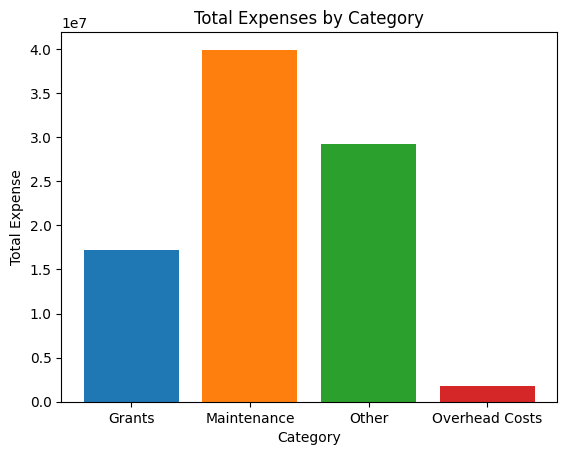

In [ ]:
# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Grouping the expenses by category and summing them up
category_spend = spend.groupby("Category")["Amount"].sum()

# Creating a bar graph using matplotlib
plt.bar(category_spend.index, category_spend.values, color=colors)

# Adding labels to the graph
plt.title("Total Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Total Expense")

# Displaying the graph
plt.show()                            